In [2]:
# libraries
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## 1. The Dataset: Sao Paulo Traffic data

#### The Sao Paulo dataset is a classification dataset: it is used for a prediction task where the goal is to determine the traffic percentages given a variety of factors. The list of attributes is as follows:

- output variable: **Slowness in traffic (%)**, continuous percentage
- input features:
    - **Hour**: a categorical variable from 1 - 27 where 1 maps to 7:00AM, 2 maps to 7:30AM, 3 maps to 8:00AM, etc
    - **Immobilized bus**: an integer value that represents the number of immodbilized buses at a given time
    - **Broken Truck**: an integer value that represents the number of broken trucks at a given time
    - **Vehicle excess**: a binary variable representing whether there is excessive traffic
    - **Accident victim**: an integer value that represents the number of broken trucks at a given time
    - **Running over**: an integer value that represents the number of traffic accident victims at a given time
    - **Fire Vehicles**: 
    - **Occurrence involving freight**: binary or integer?
    - **Incident involving dangerous freight**: binary or integer?
    - **Lack of electricity**: 
    - **Fire**: 
    - **Point of flooding**: 
    - **Manifestations**: 
    - **Defect in the network of trolleybuses**: an integer value that represents the number of defects in the trollybus network at a given time 
    - **Tree on the road**: a binary variable representing whether a tree has fallen on a given road 
    - **Semaphore off**: a binary variable representing whether the traffic lights are off
    - **Intermittent semaphore** a binary variable representing whether the traffic lights operate intermittently 
:

In [3]:
df = pd.read_csv('sao-paolo-traffic.csv',sep = ',')

cols = ['Hour', 'Immobilized bus', 'Broken Truck', 'Vehicle excess', 'Accident victim', 'Running over', 'Fire vehicles', 
        'Occurrence involving freight', 'Incident involving dangerous freight', 'Lack of electricity', 'Fire', 
        'Point of flooding', 'Manifestations', 'Defect in the network of trolleybuses', 'Tree on the road ', 'Semaphore off',
        'Intermittent Semaphore', 'Slowness in traffic (%)']

df.columns = cols
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hour                                   135 non-null    int64  
 1   Immobilized bus                        135 non-null    int64  
 2   Broken Truck                           135 non-null    int64  
 3   Vehicle excess                         135 non-null    int64  
 4   Accident victim                        135 non-null    int64  
 5   Running over                           135 non-null    int64  
 6   Fire vehicles                          135 non-null    int64  
 7   Occurrence involving freight           135 non-null    int64  
 8   Incident involving dangerous freight   135 non-null    int64  
 9   Lack of electricity                    135 non-null    int64  
 10  Fire                                   135 non-null    int64  
 11  Point 

,Hour,Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [4]:
# isolate response variable

slowness_index = list(df.columns).index("Slowness in traffic (%)")
train_cols = list(df.columns[0:slowness_index]) + list(df.columns[slowness_index+1:])
label = df.columns[slowness_index]
X_df = df[list(train_cols)]
y_df = df[label]

# convert traffic percentages to categorical variable 
# "low" if percentage is less than 12%, otherwise "high"
y_df = y_df.apply(lambda x: "low" if x < 12.0 else "high")

dataset = {
        'X': X_df,
        'y': y_df,
}

In [5]:
# Use this cell for any data-related exploration

## 2. The Model: GAMs

In [6]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['Hour', 'Immobilized bus',
                                             'Broken Truck', 'Vehicle excess',
                                             'Accident victim', 'Running over',
                                             'Fire vehicles',
                                             'Occurrence involving freight',
                                             'Incident involving dangerous '
                                             'freight',
                                             'Lack of electricity', 'Fire',
                                             'Point of flooding',
                                             'Manifestations',
                                             'Defect in the network of '
                                             'trolleybuses',
                                             'Tree on the road ',
                                             'Semaphore off',
                              

In [10]:
#Training accuracy
train_pred = ebm.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
test_pred = ebm.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(test_pred, y_test.tolist()))
accuracy_test = round(same_test/ len(test_pred), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

indices = [index for index, value in enumerate(zip(predictions, y_test.tolist())) if value[0] != value[1]]

The accuracy of the model on the training set is:  0.9901
The accuracy of the model on the test set is:  0.88235


### Visualize Global Explanations: What the model learned overall from training data

In [11]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/140352198135872/ -->

/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/Users/davisrule/opt/anaconda3/lib/python3.8/site-packages/interpret/visual/udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


### Visualize Local Explanations: How an individual prediction was made

In [12]:
ebm_local = ebm.explain_local(X_test[:15], y_test[:15], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140352197712432/ -->

## 3. Questions

Please answer these to the best of your abilities. Make sure to also answer the follow-up questions in each of the code cells.

If you need to write code to answer the question, please use the code cell provided

If you don't know how to answer a question, please note that to the researcher in the room, explain why you cannot answer the question in the cell, and move on to the next one.

#### Part 1: How familiar are you with traffic data? 

In [15]:
## How familiar are you with traffic in general? What about traffic in Sao Paulo? 
# Response: 
# If you had to give it a number, on a scale of 1-7, how would you rate your familiarity? 
# Response: 

## Have you previously interacted with datasets about traffic? What about data about traffic in Sao Paulo? 
# Response: 
# On a scale of 1-7, how would you rate your familiarity  with datasets about traffic? 
# Response: 

## Specifically, have you worked with UCI's Sao Paulo traffic dataset?  
# Response: 
# On a scale of 1-7, how would you rate your familiarity with the dataset?
# Response: 

#### Part 2: Global feature importance

In [16]:
## Is this feature importance order reasonable for the traffic data? Why or why not?
# Response: 
# On a scale of 1-7, how reasonable is the feature importance order?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?,
# Response: 


#### Part 3: Individual feature importance

In [ ]:
## How would you describe the relationship between "Hour" and slowness in traffic? 
# Response: 

## How would you describe the relationship between "Tree on the road" and slowness in traffic?

## How would you describe the relationship between "Lack of electricity" and slowness in traffic?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood these relationships correctly?
# Response: 


#### Part 4: Local predictions

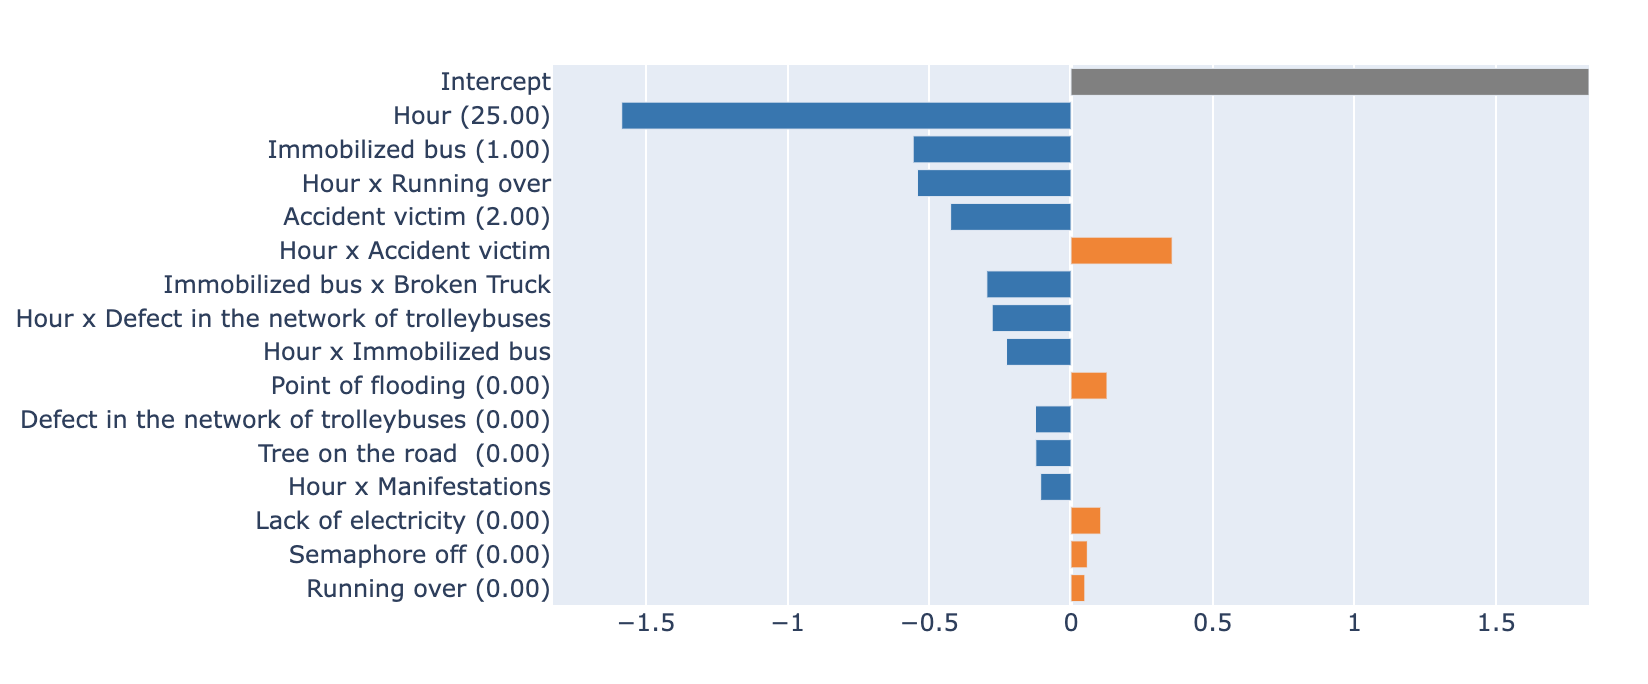

In [18]:
# Given the above input feature values, would you predict a high or low traffic percentage? Why or why not?
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?,
# Response: 


#### Part 5: Local misclassification

In [17]:
ebm_local = ebm.explain_local(X_test[8:9], y_test[8:9], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7001/140352225158048/ -->

In [ ]:
# The model misclassified this particular datapoint (above). Why do you think that happened? 
# Response: 

# On a scale of 1-7 (where 1 = Not at all and 7 = Extremely),
# How confident are you that you have understood the explanation correctly?
# Response: 


#### Part 6: Reflecting

In [17]:
# On a scale of 1-7, how easy was it to answer these questions about the Sao Paulo Traffic dataset?
# Response: 

## What made it easy/hard to answer questions about the Sao Paulo Traffic dataset?
# Response: 

## When answering the questions, were you relying on the visuals alone or was there any prior knowledge you used in your answers? 
# Response: 
